# General endocrine induction

In [118]:
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import sklearn
import umap
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from collections import Counter

import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Day 0

## Endocrine factors overexpression

In [119]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/d0/"
filenames=os.listdir(base_dir)

In [120]:
filenames.sort()

In [121]:
filenames=[filenames[30],filenames[32],filenames[34]]

In [122]:
filenames

['endocrine_0_over.pt', 'endocrine_1_over.pt', 'endocrine_2_over.pt']

In [123]:
genes=[]
for name in filenames:
    genes.append(str(name).split("_")[0])
genes=np.unique(genes)

In [124]:
all_results = []
for elt in filenames:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        all_results.append(results)

In [125]:
endo_dist = []
exo_dist = []
alpha_dist = []
for results in all_results:
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)
    
    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

        
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    

In [126]:
test=np.array(endo_dist)

In [127]:
unpert_average=np.concatenate(test[:,0],axis=0) #np.average(test[:,0],axis=0)

In [128]:
endo_dist[0][1]

array([0.505, 0.525, 0.52 , 0.485, 0.485, 0.51 , 0.495, 0.515, 0.53 ,
       0.455])

In [129]:
endo_dist_all =[]
for i in range(0,len(filenames), 3):
    print(i)
    endo_dist_norm = [unpert_average]
    for _ in range(1):
        endo_dist_norm.append(endo_dist[i][1])
        endo_dist_norm.append(endo_dist[i+1][1])
        endo_dist_norm.append(endo_dist[i+2][1])
    endo_dist_all.append(endo_dist_norm)

0


0.0025374717495534435
0.030500000000000027
8.95894286607569e-19
0.13700000000000007
1.732949716827912e-11
0.23299999999999993


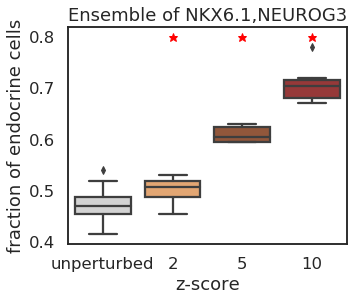

In [130]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
mypal=["lightgrey","sandybrown","sienna","brown"]
#mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.4,0.7)
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    print(p)
    print(np.average(endo_dist_all[i][j])-np.average(endo_dist_all[i][0]))
    x1, x2 = 0,j
    if p < .05:
        y=.8
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(endo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "2","5","10"])
box.set_ylabel("fraction of endocrine cells")
ax.set_xlabel("z-score")
plt.show()

In [131]:
test=np.array(exo_dist)

In [132]:
unpert_average=np.concatenate(test[:,0],axis=0)

In [133]:
exo_dist_all =[]
for i in range(1):
    exo_dist_norm = [unpert_average]
    for _ in range(1):
        exo_dist_norm.append(exo_dist[i][1])
        exo_dist_norm.append(exo_dist[i+1][1])
        exo_dist_norm.append(exo_dist[i+2][1])
    exo_dist_all.append(exo_dist_norm)

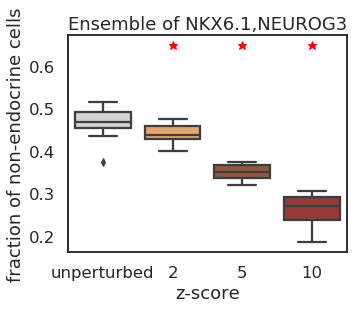

In [134]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
#mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
mypal=["lightgrey","sandybrown","sienna","brown"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.2,0.45)
#stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
stat, p = scipy.stats.ttest_ind(exo_dist_all[0][0], exo_dist_all[0][3])
x1, x2 = 0,1
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    x1, x2 = 0,j
    if p < .05:
        y=.65
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(exo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed","2","5","10"])
box.set_ylabel("fraction of non-endocrine cells")
ax.set_xlabel("z-score")
plt.show()

## Exocrine factors overexpression

In [135]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/d0/"
filenames=os.listdir(base_dir)

In [136]:
filenames.sort()

In [137]:
#filenames=[filenames[31],filenames[33],filenames[35]]
filenames=[filenames[36],filenames[38],filenames[40]]

In [138]:
filenames

['exocrine_0_over.pt', 'exocrine_1_over.pt', 'exocrine_2_over.pt']

In [139]:
genes=[]
for name in filenames:
    genes.append(str(name).split("_")[0])
genes=np.unique(genes)

In [140]:
all_results = []
for elt in filenames:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        all_results.append(results)

In [141]:
endo_dist = []
exo_dist = []
alpha_dist = []
for results in all_results:
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)
    
    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

        
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    

In [142]:
test=np.array(endo_dist)

In [143]:
unpert_average=np.concatenate(test[:,0],axis=0) #np.average(test[:,0],axis=0)

In [144]:
endo_dist[0][1]

array([0.51 , 0.5  , 0.445, 0.485, 0.425, 0.45 , 0.45 , 0.47 , 0.44 ,
       0.525])

In [145]:
endo_dist_all =[]
for i in range(0,len(filenames), 3):
    print(i)
    endo_dist_norm = [unpert_average]
    for _ in range(1):
        endo_dist_norm.append(endo_dist[i][1])
        endo_dist_norm.append(endo_dist[i+1][1])
        endo_dist_norm.append(endo_dist[i+2][1])
    endo_dist_all.append(endo_dist_norm)

0


0.5210195450988917
-0.008000000000000007
0.15139331951507717
-0.02100000000000002
0.00026396330796732355
-0.04299999999999998


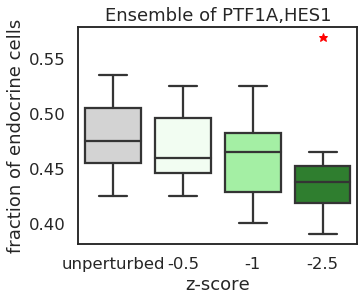

In [146]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
#mypal=["lightgrey","sandybrown","sienna","brown"]
mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.4,0.7)
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    print(p)
    print(np.average(endo_dist_all[i][j])-np.average(endo_dist_all[i][0]))
    x1, x2 = 0,j
    if p < .05:
        y=.57
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(endo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "2","5","10"])
box.set_ylabel("fraction of endocrine cells")
ax.set_xlabel("z-score")
plt.show()

In [147]:
test=np.array(exo_dist)

In [148]:
unpert_average=np.concatenate(test[:,0],axis=0)

In [149]:
exo_dist_all =[]
for i in range(1):
    exo_dist_norm = [unpert_average]
    for _ in range(1):
        exo_dist_norm.append(exo_dist[i][1])
        exo_dist_norm.append(exo_dist[i+1][1])
        exo_dist_norm.append(exo_dist[i+2][1])
    exo_dist_all.append(exo_dist_norm)

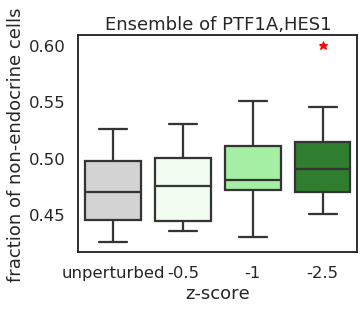

In [150]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
#mypal=["lightgrey","sandybrown","sienna","brown"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.2,0.45)
#stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
stat, p = scipy.stats.ttest_ind(exo_dist_all[0][0], exo_dist_all[0][3])
x1, x2 = 0,1
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    x1, x2 = 0,j
    if p < .05:
        y=.6
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(exo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "-0.5","-1","-2.5"])
box.set_ylabel("fraction of non-endocrine cells")
ax.set_xlabel("z-score")
plt.show()

# Day 4

## Endocrine factors overexpression

In [151]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/d4/"
filenames=os.listdir(base_dir)

In [152]:
filenames.sort()

In [153]:
filenames=[filenames[30],filenames[32],filenames[34]]

In [154]:
filenames

['endocrine_0_over.pt', 'endocrine_1_over.pt', 'endocrine_2_over.pt']

In [155]:
genes=[]
for name in filenames:
    genes.append(str(name).split("_")[0])
genes=np.unique(genes)

In [156]:
all_results = []
for elt in filenames:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        all_results.append(results)

In [157]:
endo_dist = []
exo_dist = []
alpha_dist = []
for results in all_results:
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)
    
    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

        
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    

In [158]:
test=np.array(endo_dist)

In [159]:
unpert_average=np.concatenate(test[:,0],axis=0) 

In [160]:
endo_dist[0][0]

array([0.545, 0.57 , 0.55 , 0.56 , 0.55 , 0.535, 0.57 , 0.595, 0.59 ,
       0.515])

In [161]:
endo_dist_all =[]
for i in range(0,len(filenames), 3):
    print(i)
    endo_dist_norm = [unpert_average]
    for _ in range(1):
        endo_dist_norm.append(endo_dist[i][1])
        endo_dist_norm.append(endo_dist[i+1][1])
        endo_dist_norm.append(endo_dist[i+2][1])
    endo_dist_all.append(endo_dist_norm)

0


0.15828237318286512
0.01533333333333331
0.6614913493818237
0.005833333333333357
0.8594522878372989
-0.002666666666666595


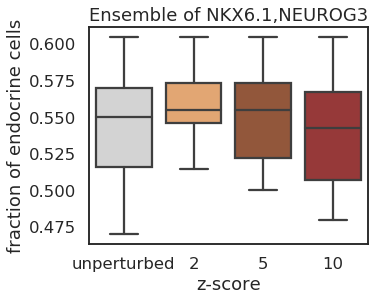

In [163]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
mypal=["lightgrey","sandybrown","sienna","brown"]
#mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.4,0.7)
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    print(p)
    print(np.average(endo_dist_all[i][j])-np.average(endo_dist_all[i][0]))
    x1, x2 = 0,j
    if p < .05:
        y=.7
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(endo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "2","5","10"])
box.set_ylabel("fraction of endocrine cells")
ax.set_xlabel("z-score")
plt.show()

In [164]:
test=np.array(exo_dist)

In [165]:
unpert_average=np.concatenate(test[:,0],axis=0)

In [166]:
exo_dist_all =[]
for i in range(1):
    exo_dist_norm = [unpert_average]
    for _ in range(1):
        exo_dist_norm.append(exo_dist[i][1])
        exo_dist_norm.append(exo_dist[i+1][1])
        exo_dist_norm.append(exo_dist[i+2][1])
    exo_dist_all.append(exo_dist_norm)

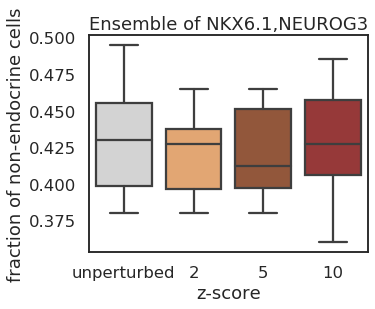

In [167]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
#mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
mypal=["lightgrey","sandybrown","sienna","brown"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.2,0.45)
x1, x2 = 0,1
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    x1, x2 = 0,j
    if p < .05:
        y=.65
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(exo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed","2","5","10"])
box.set_ylabel("fraction of non-endocrine cells")
ax.set_xlabel("z-score")
plt.show()

## Exocrine factors overexpression

In [168]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/d4/"
filenames=os.listdir(base_dir)

In [169]:
filenames.sort()

In [170]:
#filenames=[filenames[31],filenames[33],filenames[35]]
filenames=[filenames[36],filenames[38],filenames[40]]

In [171]:
filenames

['exocrine_0_over.pt', 'exocrine_1_over.pt', 'exocrine_2_over.pt']

In [172]:
genes=[]
for name in filenames:
    genes.append(str(name).split("_")[0])
genes=np.unique(genes)

In [173]:
all_results = []
for elt in filenames:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        all_results.append(results)

In [174]:
endo_dist = []
exo_dist = []
alpha_dist = []
for results in all_results:
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)
    
    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

        
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    

In [175]:
test=np.array(endo_dist)

In [176]:
unpert_average=np.concatenate(test[:,0],axis=0) #np.average(test[:,0],axis=0)

In [177]:
endo_dist[0][1]

array([0.505, 0.41 , 0.54 , 0.545, 0.475, 0.565, 0.55 , 0.47 , 0.59 ,
       0.565])

In [178]:
endo_dist_all =[]
for i in range(0,len(filenames), 3):
    print(i)
    endo_dist_norm = [unpert_average]
    for _ in range(1):
        endo_dist_norm.append(endo_dist[i][1])
        endo_dist_norm.append(endo_dist[i+1][1])
        endo_dist_norm.append(endo_dist[i+2][1])
    endo_dist_all.append(endo_dist_norm)

0


0.7323759508600889
-0.00666666666666671
0.9321134679236784
-0.0011666666666667602
0.5477142239911169
0.007333333333333303


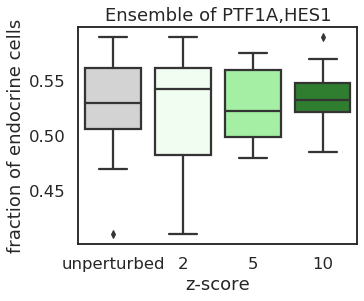

In [184]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
#mypal=["lightgrey","sandybrown","sienna","brown"]
mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.4,0.7)
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    print(p)
    print(np.average(endo_dist_all[i][j])-np.average(endo_dist_all[i][0]))
    x1, x2 = 0,j
    if p < .05:
        y=.57
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(endo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "2","5","10"])
box.set_ylabel("fraction of endocrine cells")
ax.set_xlabel("z-score")
plt.show()

In [185]:
test=np.array(exo_dist)

In [186]:
unpert_average=np.concatenate(test[:,0],axis=0)

In [187]:
exo_dist_all =[]
for i in range(1):
    exo_dist_norm = [unpert_average]
    for _ in range(1):
        exo_dist_norm.append(exo_dist[i][1])
        exo_dist_norm.append(exo_dist[i+1][1])
        exo_dist_norm.append(exo_dist[i+2][1])
    exo_dist_all.append(exo_dist_norm)

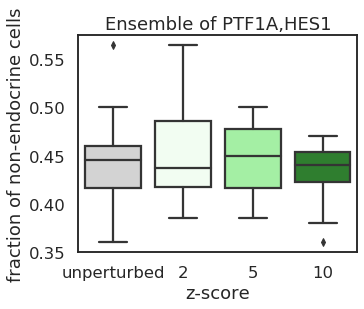

In [188]:
fig, ax = plt.subplots(figsize=(5,4), sharex=True, sharey=True)#len(filenames)/3, figsize=(10,20))
sns.set_context("talk")
sns.set_style("white")
mypal=["lightgrey","honeydew", "palegreen", "forestgreen"]
#mypal=["lightgrey","sandybrown","sienna","brown"]
#mypal=["lightgrey","white", "lightgray", "darkgray"]
ax.set_title("Ensemble of "+results["perturbed_genes"])
#ax.set_ylim(0.2,0.45)
#stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
stat, p = scipy.stats.ttest_ind(exo_dist_all[0][0], exo_dist_all[0][3])
x1, x2 = 0,1
for j in range(1, 4):
    #stat, p = scipy.stats.mannwhitneyu(neu_dist_all[i][0], neu_dist_all[i][j], alternative="greater")
    stat, p = scipy.stats.ttest_ind(endo_dist_all[i][0], endo_dist_all[i][j], equal_var=False)
    x1, x2 = 0,j
    if p < .05:
        y=.6
        ax.plot(x2, y, "*", c="r")
box=sns.boxplot(data=np.array(exo_dist_all[0]).T, ax=ax, palette=mypal)
box.set_xticklabels(["unperturbed", "2","5","10"])
box.set_ylabel("fraction of non-endocrine cells")
ax.set_xlabel("z-score")
plt.show()